In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#downloading dataset
#!wget -nv -O /resources/data/PierceCricketData.csv https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv


df = pd.read_csv("PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [3]:
x_data = df['Chirps'].values
y_data = df['Temp'].values

In [4]:
x_data

array([ 20. ,  16. ,  19.8,  18.4,  17.1,  15.5,  14.7,  17.1,  15.4,
        16.2,  15. ,  17.2,  16. ,  17. ,  14.1])

In [5]:
y_data

array([ 88.6,  71.6,  93.3,  84.3,  80.6,  75.2,  69.7,  82. ,  69.4,
        83.3,  78.6,  82.6,  80.6,  83.5,  76.3])

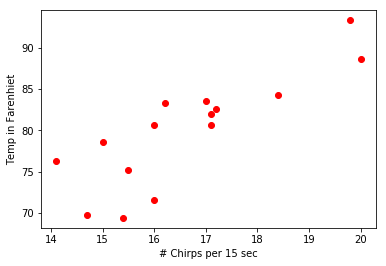

In [6]:
plt.plot(x_data, y_data, 'ro')
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")
plt.show()

In [7]:
x = tf.placeholder(dtype=tf.float32, shape=(x_data.size,1 ))
y = tf.placeholder(dtype=tf.float32, shape=(y_data.size, 1))
print x.shape, y.shape, x.shape[0] 

(15, 1) (15, 1) 15


In [8]:
w = tf.Variable(3.0) #np.random.rand(x_data.shape[0], 1)
b = tf.Variable(2.0)
ypred = tf.add(tf.multiply(x,w), b)
print ypred.shape

(15, 1)


In [9]:
nf = 1e-1
# seting up the loss function
loss = tf.reduce_mean(tf.square(ypred*nf-y*nf))
#loss = tf.reduce_mean(tf.squared_difference(y*nf, ypred*nf))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)


In [10]:
xt = np.reshape(x_data, (-1, 1))
yt = np.reshape(y_data, (-1, 1))
print xt

[[ 20. ]
 [ 16. ]
 [ 19.8]
 [ 18.4]
 [ 17.1]
 [ 15.5]
 [ 14.7]
 [ 17.1]
 [ 15.4]
 [ 16.2]
 [ 15. ]
 [ 17.2]
 [ 16. ]
 [ 17. ]
 [ 14.1]]


In [16]:
steps = {}
steps['m'] = []
steps['b'] = []
losses=[]
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for k in range(100):
            t,w_,b_,l = s.run([train,w, b,loss], feed_dict={x:xt, y:yt})
            steps['m'].append(w_)
            steps['b'].append(b_)
            losses.append(l)
#print losses
    

In [17]:
#yf =np.reshape(yp, -1,0)

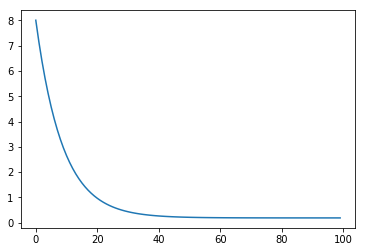

In [18]:
#plt.plot(x_data, yf,'ro')
#plt.show()
plt.plot(losses[:])
plt.show()

In [14]:
print losses

[8.0092478, 7.1559806, 6.3957496, 5.71841, 5.1149282, 4.5772471, 4.0981932, 3.6713736, 3.2910931, 2.9522779, 2.6504049, 2.3814473, 2.1418169, 1.9283146, 1.7380905, 1.5686091, 1.4176065, 1.2830694, 1.1632019, 1.0564036, 0.96125096, 0.87647289, 0.80093968, 0.73364121, 0.67368084, 0.62025768, 0.57266033, 0.53025281, 0.49246928, 0.45880556, 0.42881218, 0.40208894, 0.37827981, 0.35706699, 0.33816713, 0.32132751, 0.30632445, 0.29295763, 0.28104755, 0.27043632, 0.26098186, 0.25255808, 0.24505323, 0.23836617, 0.23240849, 0.22710046, 0.22237124, 0.2181576, 0.21440345, 0.21105854, 0.20807816, 0.20542265, 0.20305702, 0.20094915, 0.19907093, 0.19739766, 0.19590689, 0.19457871, 0.19339527, 0.19234069, 0.19140102, 0.19056407, 0.18981816, 0.1891537, 0.18856144, 0.188034, 0.18756387, 0.18714489, 0.18677168, 0.18643911, 0.18614282, 0.18587872, 0.18564339, 0.18543385, 0.18524715, 0.18508062, 0.18493226, 0.18480012, 0.18468231, 0.18457741, 0.18448368, 0.18440054, 0.18432617, 0.18425982, 0.18420079, 0.184